##聚类模型评估

KMeans 0 0.39163505848468966
KMeans 1 0.4252937141275514
KMeans 2 0.8260921886020176
KMeans 3 0.38634027352692135
DBSCAN 1 0.33267376070372107
DBSCAN 2 0.8260921886020176
Agglomerative 0 0.35263687562850454
Agglomerative 1 0.3975620025321244
Agglomerative 2 0.8260921886020176
Agglomerative 3 0.35948041700993144


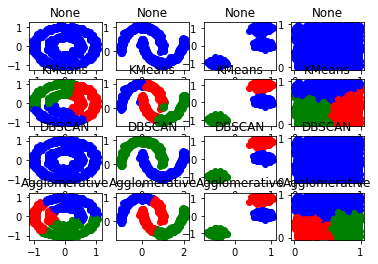

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons#用于生成样本点
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
n_samples=1000
circles = make_circles(n_samples,factor=0.5,noise=0.05)#factors:小圆与大圆之间的间距
moons = make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state =8,center_box=(-1,1),cluster_std=0.1)
random_data=np.random.rand(n_samples,2),None #2维,无标注
#print(circles)
colors='bgrcmyk'#色系
data=[circles,moons,blobs,random_data]
##(模型名称，模型实体),n_clusters=K聚类个数
models=[('None',None),('KMeans',KMeans(n_clusters=3)),
        ('DBSCAN',DBSCAN(min_samples=3,eps=0.3)),#eps：E邻域
        ("Agglomerative",AgglomerativeClustering(n_clusters=3,linkage="ward"))]
#聚类模型评估
from sklearn.metrics import silhouette_score#轮廓系数
f=plt.figure()
for inx,clt in enumerate(models):#下标，模型
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)#拟合即聚类
            clt_res=clt_entity.labels_.astype(np.int)
        #如多个模型分布在同一行，每一列是同一个数据集，得到他在第几行的第几个位置
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        plt.title(clt_name)
        try:
            #打印轮廓系数
            print(clt_name,i,silhouette_score(X,clt_res))
        except:
            pass
        #标注是多少就取什么颜色，不同标注附上不同颜色
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

In [ ]:
#K-Means是面向切割的方法，如果拿轮廓系数比较他的性能是最好的
#评价指标只是参考，具体要根据应用场景多思考多分析